In [1]:
from keras.api.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.api.models import Sequential
from keras.api.optimizers import Adam
from keras_preprocessing.image import ImageDataGenerator
from keras.api.optimizers.schedules import ExponentialDecay
import cv2
from keras.api.models import model_from_json
import numpy as np

In [2]:
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)


In [3]:
train_generator = train_data_gen.flow_from_directory(
    'dataset/train/',
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical')


Found 28709 images belonging to 7 classes.


In [4]:
validation_generator = validation_data_gen.flow_from_directory(
        'dataset/test/',
        target_size=(48, 48),
        batch_size=64,
        shuffle=False,
        color_mode='grayscale',
        class_mode='categorical')


Found 7178 images belonging to 7 classes.


In [5]:
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                         input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

emotion_model.summary()

cv2.ocl.setUseOpenCL(False)

initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=100000,
                               decay_rate=0.96)

optimizer = Adam(learning_rate=lr_schedule)

emotion_model.compile(loss='categorical_crossentropy', optimizer=optimizer,
                      metrics=['accuracy'])

c:\Users\SHAURYAM DUBEY\Documents\.repo-github\csnn\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         7,175 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,345,607 (8.95 MB)

 Trainable params: 2,345,607 (8.95 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:

# Train the neural network/model

emotion_model_info = emotion_model.fit(
    train_generator,
    steps_per_epoch=28709 // 64,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=7178 // 64)
# save model structure in jason file
model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
emotion_model.save_weights('emotion_model.h5')

Epoch 1/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 220s 491ms/step - accuracy: 0.2520 - loss: 1.8132 - val_accuracy: 0.3609 - val_loss: 1.6635
Epoch 2/20
  1/448 ━━━━━━━━━━━━━━━━━━━━ 47s 107ms/step - accuracy: 0.4062 - loss: 1.5517

c:\Users\SHAURYAM DUBEY\Documents\.repo-github\csnn\venv\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4062 - loss: 1.5517 - val_accuracy: 0.3581 - val_loss: 1.6628
Epoch 3/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 61s 137ms/step - accuracy: 0.3615 - loss: 1.6353 - val_accuracy: 0.4244 - val_loss: 1.5277
Epoch 4/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4531 - loss: 1.4525 - val_accuracy: 0.4240 - val_loss: 1.5279
Epoch 5/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 61s 136ms/step - accuracy: 0.4110 - loss: 1.5324 - val_accuracy: 0.4461 - val_loss: 1.4569
Epoch 6/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4219 - loss: 1.3465 - val_accuracy: 0.4429 - val_loss: 1.4586
Epoch 7/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 59s 132ms/step - accuracy: 0.4457 - loss: 1.4617 - val_accuracy: 0.4743 - val_loss: 1.3997
Epoch 8/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4062 - loss: 1.5786 - val_accuracy: 0.4720 - val_loss: 1.3947
Epoch 9/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 63s 141ms/step - accuracy: 0.4656 - loss: 1.4004 - val_accuracy: 0

ValueError: The filename must end in `.weights.h5`. Received: filepath=emotion_model.h5

In [14]:
emotion_model.save_weights('emotion_model.weights.h5')

In [15]:
accuracy = emotion_model_info.history['accuracy']
val_accuracy = emotion_model_info.history['val_accuracy']
loss = emotion_model_info.history['loss']
val_loss = emotion_model_info.history['val_loss']

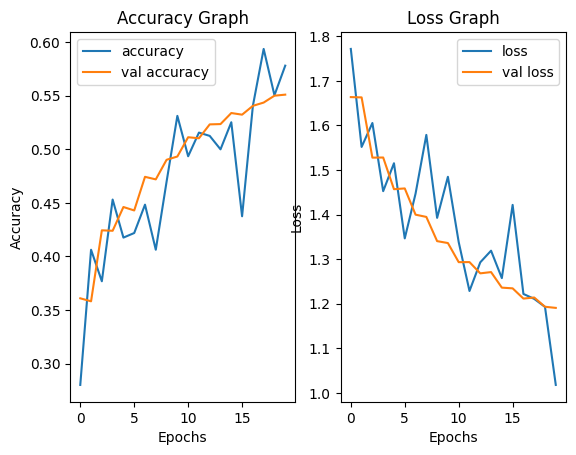

In [16]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy, label='val accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# loss graph
plt.subplot(1, 2, 2)
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
# load json and create model
import numpy
import os
import numpy as np

json_file = open('emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("emotion_model.weights.h5.h5")
print("Loaded model from disk")

truey = []
predy = []
x = np.load('./modXtest.npy')
y = np.load('./modytest.npy')

yhat = loaded_model.predict(x)
yh = yhat.tolist()
yt = y.tolist()
count = 0

for i in range(len(y)):
    yy = max(yh[i])
    yyt = max(yt[i])
    predy.append(yh[i].index(yy))
    truey.append(yt[i].index(yyt))
    if (yh[i].index(yy) == yt[i].index(yyt)):
        count += 1

acc = (count/len(y))*100

# saving values for confusion matrix and analysis
np.save('truey', truey)
np.save('predy', predy)
print("Predicted and true label values saved")
print("Accuracy on test set :"+str(acc)+"%")

Loaded model from disk


c:\Users\SHAURYAM DUBEY\Documents\.repo-github\csnn\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


113/113 ━━━━━━━━━━━━━━━━━━━━ 66s 583ms/step
Confusion Matrix:
 [[   3    0    0    0   65  349  541]
 [   0    0    0    0    6   31   74]
 [   3    0    0    1   59  302  659]
 [   2    0    0    0   87  570 1115]
 [   6    0    0    2   57  428  740]
 [   4    0    0    1   89  480  673]
 [   2    0    0    0   36  208  585]]


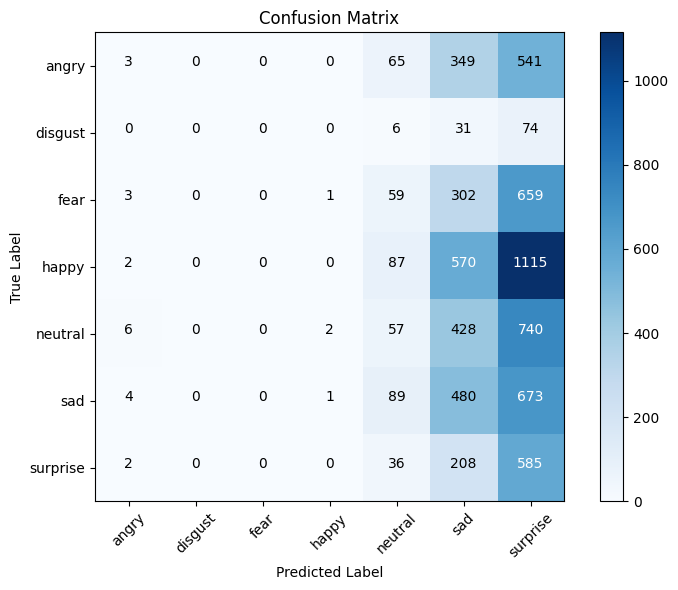

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

json_file = open('emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("emotion_model.weights.h5")
print("Loaded model from disk")

# Get true labels from validation generator
y_true = validation_generator.classes  # Actual class labels

# Get class labels mapping
class_labels = list(validation_generator.class_indices.keys())

# Predict using the generator
predictions = emotion_model.predict(validation_generator)

# Convert predictions to class indices
y_pred = np.argmax(predictions, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print confusion matrix
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Annotate each cell with count
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()